# <center><h1 style = "color:navy;">Recommendation System</h1></center>

In [115]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

## <h1 style="color:indigo">1.  Data preprocessing</h1>

In [116]:
anime = pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [117]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [118]:
anime["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [119]:
anime.shape

(12294, 7)

In [120]:
anime.head(30)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [121]:
anime[anime["anime_id"].duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [122]:
anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

In [123]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [124]:
anime[anime['genre'].isna()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,NaN,843
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


In [125]:
anime["genre"] = anime["genre"].fillna("")

In [126]:
anime[anime["episodes"]=='Unknown']['type'].unique()

array(['TV', 'Special', 'ONA', 'Music', 'Movie', 'OVA', nan], dtype=object)

In [127]:
anime[anime["episodes"]=='0']

,anime_id,name,genre,type,episodes,rating,members


For now, we will replace, 'Unknown' anime episode numbers with 0 and and check the mode of episodes for each genre and replace them with the mode

In [128]:
anime.loc[anime['episodes'] == 'Unknown','episodes']=0

In [129]:
anime[anime['episodes'] ==0]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,0,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,0,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,0,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,0,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,0,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,0,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,0,NaN,392
12280,34312,Saimin Class,Hentai,OVA,0,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,0,NaN,195


In [130]:
anime['episodes'] = anime['episodes'].astype(int)

In [131]:
mode_val = anime.groupby('type')['episodes'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

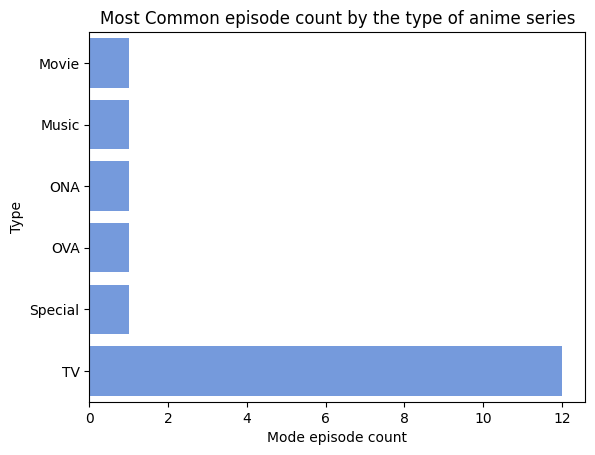

In [132]:
sns.barplot(y=mode_val['type'], x=mode_val['episodes'], color='cornflowerblue')
plt.xlabel("Mode episode count")
plt.ylabel("Type")
plt.title("Most Common episode count by the type of anime series")
plt.show()

In [139]:
for i in ['TV', 'Special', 'ONA', 'Music', 'Movie', 'OVA']:
    anime.loc[(anime['type'] == i) & (anime['episodes'] == 0),'episodes']=1

In [140]:
anime.loc[(anime['type'] == 'TV') & (anime['episodes'] == 0),'episodes']=12

In [141]:
anime[anime['type'].isna()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,0,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,0,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,0,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,0,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,0,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,0,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,0,NaN,4017
10983,34332,Flying Babies,,NaN,0,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,0,NaN,1045
10990,34485,Ganko-chan,,NaN,0,NaN,11


#### We will just delete this animes because three of the columns have null values and only valuable feature is genre.

In [142]:
drp_ind = anime[anime['type'].isna()].index
anime.drop(index=drp_ind,inplace=True)

In [143]:
anime.shape

(12269, 7)

#### We will assume that the null values in rating columns represent that non have rated the anime. We will replace that null values in that column by 0

In [144]:
anime.loc[anime["rating"].isna(),'rating']=0

In [145]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [146]:

anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [149]:
anime[['rating','episodes','members']].describe()

,rating,episodes,members
count,12269.000000,12269.000000,1.226900e+04
mean,6.365731,12.090309,1.809484e+04
std,1.313482,46.294789,5.487089e+04
min,0.000000,1.000000,5.000000e+00
25%,5.830000,1.000000,2.240000e+02
50%,6.550000,2.000000,1.549000e+03
75%,7.170000,12.000000,9.453000e+03
max,10.000000,1818.000000,1.013917e+06


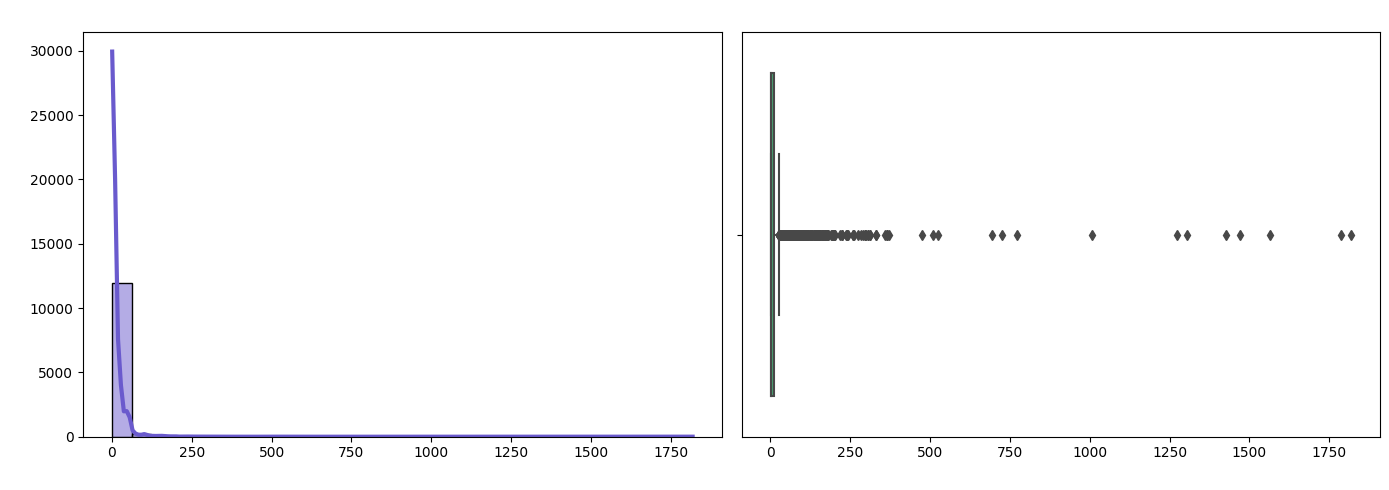

In [151]:
# Define dark pastel colors
hist_color = "#6A5ACD"  # Pastel Purple (Slate Blue)
kde_line_color = "#800080"   # Dark Purple for KDE Line
box_color = "#3CB371"   # Pastel Green (Medium Sea Green)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    anime['episodes'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=anime['episodes'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


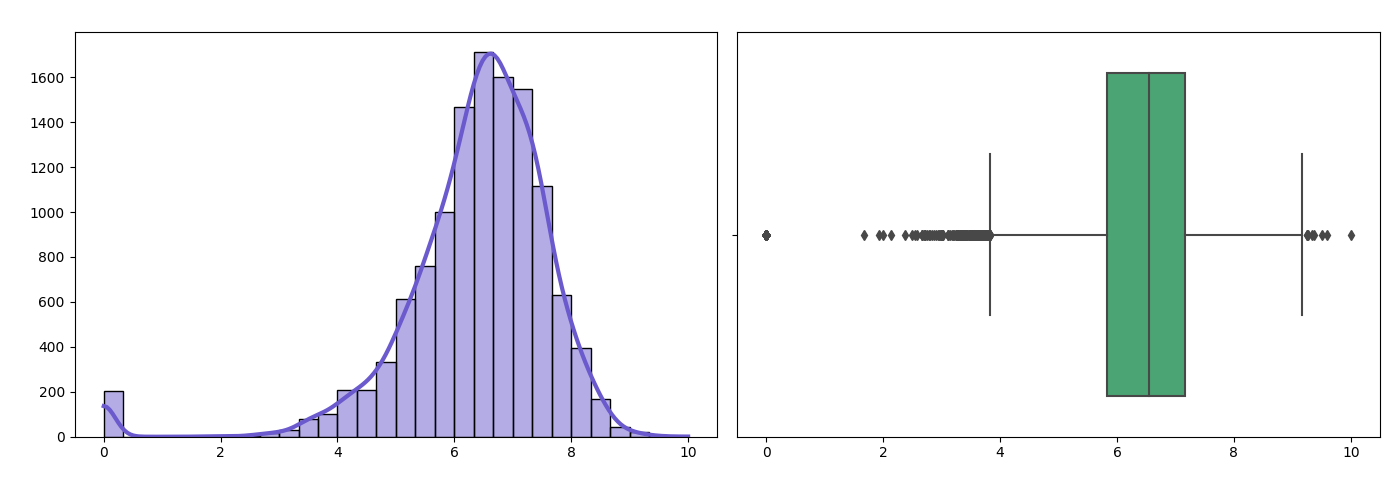

In [152]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 

# Histogram + KDE (Overlapping)
sns.histplot(
    anime['rating'], bins=30, kde=True, color=hist_color, alpha=0.5,  # Transparent Histogram_
    line_kws={'linewidth': 3, 'color': kde_line_color},    # Darker KDE Line
    ax=axes[0]
)

# Styling for Histogram + KDE
axes[0].set_title("Histogram & KDE", color="white")
axes[0].set_xlabel("Value", color="white")
axes[0].set_ylabel("Frequency / Density", color="white")

# Boxplot
sns.boxplot(x=anime['rating'], color=box_color, ax=axes[1])

# Styling for Boxplot
axes[1].set_title("Boxplot", color="white")
axes[1].set_xlabel("Value", color="white")
# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [153]:
anime['members'].min()

5

In [154]:
anime['members'].max()

1013917

In [156]:
pd.options.display.float_format = '{:.2f}'.format 
anime['members'].describe()

count     12269.00
mean      18094.84
std       54870.89
min           5.00
25%         224.00
50%        1549.00
75%        9453.00
max     1013917.00
Name: members, dtype: float64

## <h1 style="color:indigo">2. Feature Extraction</h1>

### Preprocess Genre (Convert Categorical Data to Numeric)

We will be using TF-IDF for transformation as any other encoder will give equal weights to each individual genre. This way we give more weights to rare genre (for example :"Mecha") and lower weight for more frequent genres.

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF to transform the genre column into a numerical matrix
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(anime["genre"])

#### Standardize other two columns: episodes and rating

In [215]:
from sklearn.preprocessing import MinMaxScaler

num_features = anime[["episodes", "rating","members"]]

# Scale features between 0 and 1
scaler = MinMaxScaler()
num_features_scaled = scaler.fit_transform(num_features)

#### Combining features

In [216]:
import scipy.sparse as sp
from scipy.sparse import hstack

# Convert numerical features to a sparse matrix and stack with genre matrix
final_matrix = hstack([genre_matrix, sp.csr_matrix(num_features_scaled)])


## <h1 style="color:indigo">3. Recommendation Systems</h1>

#### Computer cosine similarity

In [217]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cosine_sim = cosine_similarity(final_matrix)


The below function recommends the top k recommendations based on the "k" that is passed on to the function

In [175]:
# Step 7: Recommendation Function
def recommend_anime(anime_title, top_k=5):
    idx = anime[anime["name"] == anime_title].index
    if len(idx) == 0:
        return "Anime not found."
    
    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_k+1]
    
    recommended_anime = anime.iloc[[i[0] for i in sim_scores]][["name", "rating"]]
    return recommended_anime

In [178]:
recommend_anime("Naruto", top_k=5)

,name,rating
615,Naruto: Shippuuden,7.94
206,Dragon Ball Z,8.32
346,Dragon Ball,8.16
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50


In [177]:
recommend_anime("Kimi no Na wa.", top_k=5)

,name,rating
5805,Wind: A Breath of Heart OVA,6.35
6394,Wind: A Breath of Heart (TV),6.14
1111,Aura: Maryuuin Kouga Saigo no Tatakai,7.67
878,Shakugan no Shana II (Second),7.79
1201,Angel Beats!: Another Epilogue,7.63


The above function can be slightly improved by filtering based on a threshold to get the recommended anime which ensures that we get highly relevant recommendations based on the good scores.

In [196]:
def recommend_anime(anime_name, cosine_sim, anime_df, threshold=0.5):
    # Get index of anime
    idx = anime[anime['name'] == anime_name].index[0]

    # Get similarity scores and filter by threshold
    sim_scores = list(enumerate(cosine_sim[idx]))
    filtered_scores = [x for x in sim_scores if x[1] >= threshold]  # Apply threshold

    # Sort by similarity score (descending) and get top N recommendations
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    # Get anime names
    anime_indices = [x[0] for x in filtered_scores]
    return anime.iloc[anime_indices][['name', 'rating','genre']]

In [185]:
recommend_anime("Steins;Gate", cosine_sim, anime, threshold=0.8)

,name,rating
3,Steins;Gate,9.17
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
126,Steins;Gate: Oukoubakko no Poriomania,8.46
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
5126,Under the Dog,6.55
493,Higashi no Eden,8.03
5525,Loups=Garous,6.43
2518,Ibara no Ou,7.24
238,Gankutsuou,8.27
36,Fate/Zero 2nd Season,8.73


In [184]:
recommend_anime("Steins;Gate", cosine_sim, anime, threshold=0.9)

,name,rating
3,Steins;Gate,9.17
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
126,Steins;Gate: Oukoubakko no Poriomania,8.46
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34


In [186]:
recommend_anime("Naruto", cosine_sim, anime, threshold=0.9)

,name,rating
841,Naruto,7.81
615,Naruto: Shippuuden,7.94
206,Dragon Ball Z,8.32
346,Dragon Ball,8.16
1472,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
1573,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
486,Boruto: Naruto the Movie,8.03


In [187]:
recommend_anime("Naruto", cosine_sim, anime, threshold=0.95)

,name,rating
841,Naruto,7.81
615,Naruto: Shippuuden,7.94


In [188]:
recommend_anime("Kimi no Na wa.", cosine_sim, anime, threshold=0.95)

,name,rating
0,Kimi no Na wa.,9.37
5805,Wind: A Breath of Heart OVA,6.35
6394,Wind: A Breath of Heart (TV),6.14
1111,Aura: Maryuuin Kouga Saigo no Tatakai,7.67


In [189]:
recommend_anime("Steins;Gate", cosine_sim, anime, threshold=0.95)

,name,rating
3,Steins;Gate,9.17
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61


**For stricter recommendations 0.95 seems like a good threshold.**


------


**1. Can you explain the difference between user-based and item-based collaborative filtering?**

- User-based collaborative filtering recommends items to a user based on the preferences of other users who are similar to them. It assumes that if user A likes items X and Y, and user B likes Y and Z, they have similar tastes, so user A would like item Z based on user B’s preferences. 
- Item-based collaborative filtering, on the other hand, recommends items based on the similarity between items themselves. It works by comparing the items a user has liked or interacted with to other items that similar users have liked. If user A likes item X, the system may recommend item Y if many other users who liked X also liked Y.

**2. What is collaborative filtering, and how does it work?**

Collaborative filtering works by making recommendations based on the past behavior or preferences of users. The basic idea is that if two users have similar tastes or preferences in the past, they will likely have similar preferences in the future.

Here’s how it works:

- Data collection: The system collects data on users’ interactions with items (like ratings, clicks, or purchases).
- Similarity calculation: It calculates the similarity between users or items. For example, it may measure how closely users have rated items in the same way (user-based) or how similar items are based on ratings from different users (item-based).
- Prediction: The system uses the calculated similarities to predict which items a user might like. For instance, if User A liked items X and Y, and User B liked item X, the system may predict that User B will also like item Y, based on their shared preferences.

Collaborative filtering doesn't require knowledge about the content of the items themselves, but instead relies on the patterns of user interaction to generate recommendations.